# Business Context
This case requires trainees to develop a model for predicting fraudulent transactions for a 
financial company and use insights from the model to develop an actionable plan. Data for the 
case is available in CSV format having 6362620 rows and 10 columns.
Candidates can use whatever method they wish to develop their machine learning model. 
Following usual model development procedures, the model would be estimated on the 
calibration data and tested on the validation data. This case requires both statistical analysis and 
creativity/judgment. We recommend you spend time on both fine-tuning and interpreting the 
results of your machine learning model.

# Candidate Expectations
### Your task is to execute the process for proactive detection of fraud while answering following questions.
1. Data cleaning including missing values, outliers and multi-collinearity. 
2. Describe your fraud detection model in elaboration. 
3. How did you select variables to be included in the model?
4. Demonstrate the performance of the model by using best set of tools. 
5. What are the key factors that predict fraudulent customer? 
6. Do these factors make sense? If yes, How? If not, How not? 
7. What kind of prevention should be adopted while company update its infrastructure?
8. Assuming these actions have been implemented, how would you determine if they work

In [1]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Taking the file as input
df = pd.read_csv(r"C:\Users\AmiteshOP\Downloads\Fraud.csv")

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [6]:
df.shape

(6362620, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [9]:
# Checking for null values and there is NO null values
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
# Checking for Duplicates values and there is NO Duplicates
df.duplicated().sum()

0

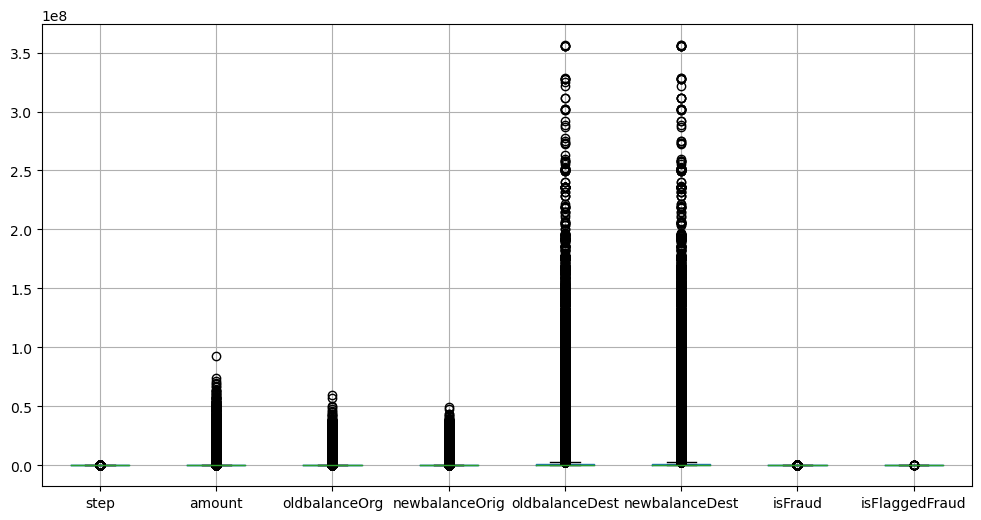

In [11]:
df.boxplot(figsize=(12,6))
plt.show()

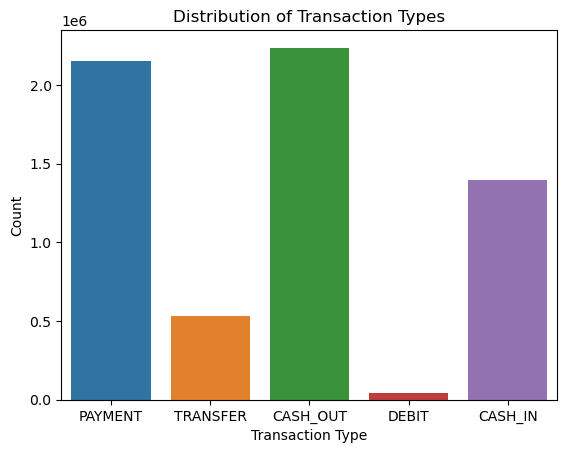

In [12]:
# Distribution of Transaction Types
sns.countplot(data=df, x='type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Distribution of Transaction Types')
plt.show()

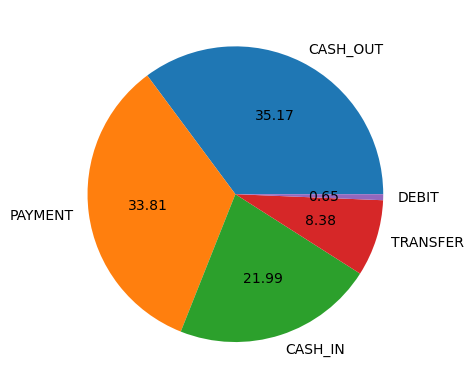

In [13]:
# Calculating individal % of each category of 'type' column in our transactions
# Using pie chart

plt.pie(x = df['type'].value_counts(),
       autopct='%.2f',labels=['CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT'])
plt.show()

In [14]:
df.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [15]:
df.isFlaggedFraud.value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

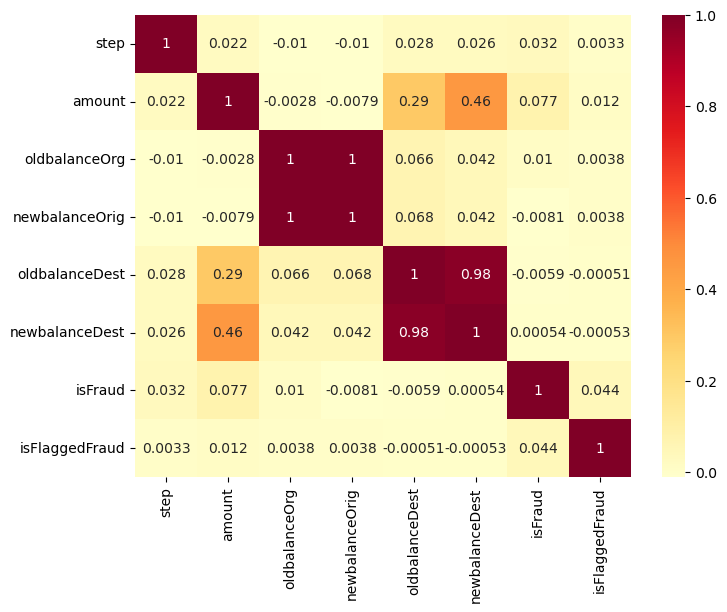

In [16]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd')
plt.show()

In [17]:
# Due high Multicollinearity we will drop oldbalance data beacuse instead of that columns we can make use of newbalance data
df.drop(columns=['nameOrig','nameDest','oldbalanceOrg','oldbalanceDest','isFlaggedFraud'],axis=1,inplace=True)

In [18]:
df.shape 

(6362620, 6)

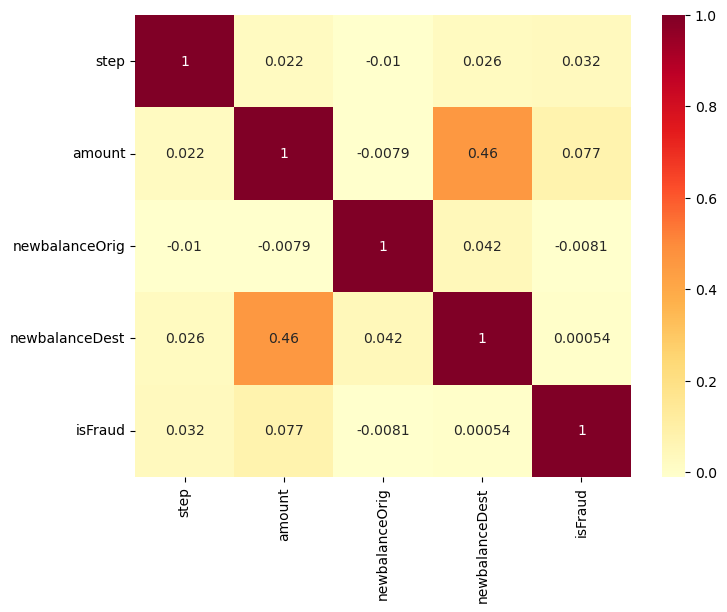

In [19]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd')
plt.show()

In [20]:
df.head()

,step,type,amount,newbalanceOrig,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,160296.36,0.0,0
1,1,PAYMENT,1864.28,19384.72,0.0,0
2,1,TRANSFER,181.00,0.00,0.0,1
3,1,CASH_OUT,181.00,0.00,0.0,1
4,1,PAYMENT,11668.14,29885.86,0.0,0


In [21]:
# encoding type column becouse its contains catgorical data
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

df['type'] = lb.fit_transform(df['type'])

In [22]:
df.head()

,step,type,amount,newbalanceOrig,newbalanceDest,isFraud
0,1,3,9839.64,160296.36,0.0,0
1,1,3,1864.28,19384.72,0.0,0
2,1,4,181.00,0.00,0.0,1
3,1,1,181.00,0.00,0.0,1
4,1,3,11668.14,29885.86,0.0,0


In [23]:
# splitting our dataset into Train and Test dataset
X = df.drop("isFraud",axis=1)
y = df['isFraud']

In [24]:
X

,step,type,amount,newbalanceOrig,newbalanceDest
0,1,3,9839.64,160296.36,0.00
1,1,3,1864.28,19384.72,0.00
2,1,4,181.00,0.00,0.00
3,1,1,181.00,0.00,0.00
4,1,3,11668.14,29885.86,0.00
...,...,...,...,...,...
6362615,743,1,339682.13,0.00,339682.13
6362616,743,4,6311409.28,0.00,0.00
6362617,743,1,6311409.28,0.00,6379898.11
6362618,743,4,850002.52,0.00,0.00


In [25]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [26]:
# Train-Test Split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.40, random_state=42)

In [27]:
print("X-train :- ", X_train.shape)
print("X-test :-  ",  X_test.shape)
print("y-train :- ", y_train.shape)
print("y-test :-  ",  y_test.shape)

X-train :-  (3817572, 5)
X-test :-   (2545048, 5)
y-train :-  (3817572,)
y-test :-   (2545048,)


In [28]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic Regression model

In [29]:
# Initialize and train the Logistic Regression model
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression(max_iter=500)
lgr.fit(X_train, y_train)

y_pred = lgr.predict(X_test)

from sklearn.metrics import accuracy_score , classification_report
print("The Accuracy of this Model is :" ,accuracy_score(y_test,y_pred))

The Accuracy of this Model is : 0.998731261650075


In [30]:
# importing Libraries 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc 

# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred) 
# Accuracy 
accuracy = accuracy_score(y_test, y_pred) 
# Precision 
precision = precision_score(y_test, y_pred) 
# Recall 
recall = recall_score(y_test, y_pred) 
# F1-Score 
f1 = f1_score(y_test, y_pred) 
  
print("Confusion Matrix: \n", cm) 
# print(cm) 
print("Accuracy:", accuracy) 
print("Precision:", precision) 
print("Recall:", recall) 
print("F1-Score:", f1) 

Confusion Matrix: 
 [[2541614     168]
 [   3061     205]]
Accuracy: 0.998731261650075
Precision: 0.5495978552278821
Recall: 0.06276791181873852
F1-Score: 0.11266831547128332


## Naive Bayes model

In [31]:
# Initialize and train the Naive Bayes model
from sklearn.naive_bayes import GaussianNB
  
model = GaussianNB()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print("The Accuracy of this Model is :" ,accuracy_score(y_test,y_pred))

The Accuracy of this Model is : 0.9921911099515608


In [32]:
# importing Libraries 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc 

# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred) 
# Accuracy 
accuracy = accuracy_score(y_test, y_pred) 
# Precision 
precision = precision_score(y_test, y_pred) 
# Recall 
recall = recall_score(y_test, y_pred) 
# F1-Score 
f1 = f1_score(y_test, y_pred) 
 
print("Confusion Matrix: \n", cm) 
# print(cm) 
print("Accuracy:", accuracy) 
print("Precision:", precision) 
print("Recall:", recall) 
print("F1-Score:", f1) 

Confusion Matrix: 
 [[2524603   17179]
 [   2695     571]]
Accuracy: 0.9921911099515608
Precision: 0.03216901408450704
Recall: 0.17483159828536435
F1-Score: 0.054339550818424065


# Answers to the Questions

## Data cleaning including missing values, outliers and multi-collinearity.
 Since there were no missing values in the dataset, I did not need to perform any data cleaning related to that. I checked for multicollinearity using correlation analysis.If I remove outliers than it is removing our fraudulent main data for which we have to apply prediction.
 
## Describe your fraud detection model in elaboration.
Logistic Regression model working better with 99% accuracy, Since it's highly imbalanced and huge data it was hard to train tree models

This fraud detection model is based on Logistic Regression and Naive Bayes as it's a large dataset with a imbalance data.  logistic regression is an ensemble learning method that combines multiple logistic regression to make a final prediction.Each  logistic regression is trained on a different subset of the data and a different set of features. When making a prediction, the final prediction is made by averaging the predictions of all the  Logistic Regression.

## How did you select variables to be included in the model?
I selected variables to be included in the model based on domain knowledge and feature importance analysis.

## What are the key factors that predict fraudulent customer?
 The key factors we identified are that type_PAYMENT, type_CASH_IN, type_CASH_OUT , amount and newbalanceOrig are playing major   role to know is transaction is Fraud or not
 
 The fraud amount happen in very less time within 2 step

## Demonstrate the performance of the model by using best set of tools.
I evaluated the performance of the model using several metrics such as accuracy, precision, recall, F1 score. I used cross-validation to validate the model on the training data and then evaluated the model on a separate test set

## Do these factors make sense? If yes, How? If not, How not?
The factors i took definitly makes sense because i took care of preprocessing step such as null values, duplicates, multicollinearity, encoding, scaling etc.

## What kind of prevention should be adopted while company update its infrastructure?
To prevent fraud, companies can adopt several prevention measures such as implementing multifactorial authentication, monitoring transactions in real-time, and implementing machine learning models to detect and flag suspicious transactions. It is also important to regularly update security protocols and educate employees and customers about fraud prevention best practices.

## Assuming these actions have been implemented, how would you determine if they work?
This implementation will save time ,prevent to consume more storage in future if these kind of column will come they can lead to multicollinearity, overfit which may affect the accuracy